In [94]:
import pandas as pd
import numpy as np
   
tourney_df = pd.read_csv("data/data.csv", index_col=0)
tourney_df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,dPOM,dPOM_rating,dDOL,dDOL_rating,dCOL,dCOL_rating,dRTH,dRTH_rating,dRPI,dRPI_rating
0,2003,134,1421,92,1411,84,N,1,32,69,...,-5,0.300940,-19,1.168393,-1,0.064190,6,-0.367220,31,-2.022637
1,2003,136,1112,80,1436,51,N,0,31,66,...,-141,20.770848,-154,22.830534,-142,21.967031,-180,24.625314,-142,21.967031
2,2003,136,1113,84,1272,71,N,0,31,59,...,12,-2.353395,27,-4.430384,19,-3.534954,16,-3.078419,6,-1.075410
3,2003,136,1141,79,1166,73,N,0,29,53,...,-23,3.443939,-19,3.636225,-17,3.329047,-33,5.059430,-21,3.468980
4,2003,136,1143,76,1301,74,N,1,27,64,...,-8,1.076629,-24,3.706615,-28,3.975749,-12,1.854306,-20,2.759585


# Choosing Features to Use for Model

Edit featureList below to use any of the features in the data frame above (see above for names of columns).  

In [123]:
systems = ['SAG', 'MOR', 'BOB', 'WOL', 'WLK', 'POM', 'DOL', 'COL', 'RTH', 'RPI']

teamfList = []
#teamfList = systems
teamfList = ['efg', 'to_p', 'orp', 'ftr']
#teamfList.append('wins')
featureList = []
for f in teamfList:
    featureList.append(f+'0')
    featureList.append(f+'1')

for s in systems:
    featureList.append('d'+s+'_rating')
#for f in ['fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']:
#    for mod in ['avg_', 'std_']:
#        featureList.append(mod+f+'0')
#        featureList.append(mod+f+'1')
print("Feature list = {0}".format(featureList))

Feature list = ['efg0', 'efg1', 'to_p0', 'to_p1', 'orp0', 'orp1', 'ftr0', 'ftr1', 'dSAG_rating', 'dMOR_rating', 'dBOB_rating', 'dWOL_rating', 'dWLK_rating', 'dPOM_rating', 'dDOL_rating', 'dCOL_rating', 'dRTH_rating', 'dRPI_rating']


In [124]:
y = tourney_df['team0Win'].values # results
X = tourney_df[featureList].values # features

In [125]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2721)

In [126]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print("Means = {0}, Stdevs = {1}".format(scaler.mean_, scaler.scale_))

Means = [ 0.521226    0.52307238  0.35019202  0.34565731  0.35094535  0.34812408
  0.39555391  0.39323486 -0.17708263 -0.05278493 -0.17043782 -0.25561367
 -0.14002634 -0.19303966 -0.28366765 -0.19315342 -0.20511823 -0.17128647], Stdevs = [  0.02595538   0.02569591   0.07003138   0.06896612   0.04060464
   0.04082454   0.05040042   0.04943425   9.93297982  10.23068498
   9.77765956   9.18024734   9.4189225    9.95005126   9.44093905
   9.21172178  10.213853     8.85636658]


In [127]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train our model!

In [128]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(probability=True, kernel='rbf'), scoring="log_loss", param_grid=param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train) 
print "The best parameters are %s with a score of %0.4f" % (grid.best_params_, grid.best_score_) 

The best parameters are {'C': 1.0, 'gamma': 0.001} with a score of -0.5251


In [129]:
model = grid.best_estimator_
y_pred = model.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
print("Log loss is {0}".format(metrics.log_loss(y_test, y_pred)))

Log loss is 0.52217835634


In [9]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
#C_range = np.logspace(0, 3, 4)
#gamma_range = np.logspace(-3,0,4)
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = svm.SVC(probability=True, kernel='rbf',C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))

/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


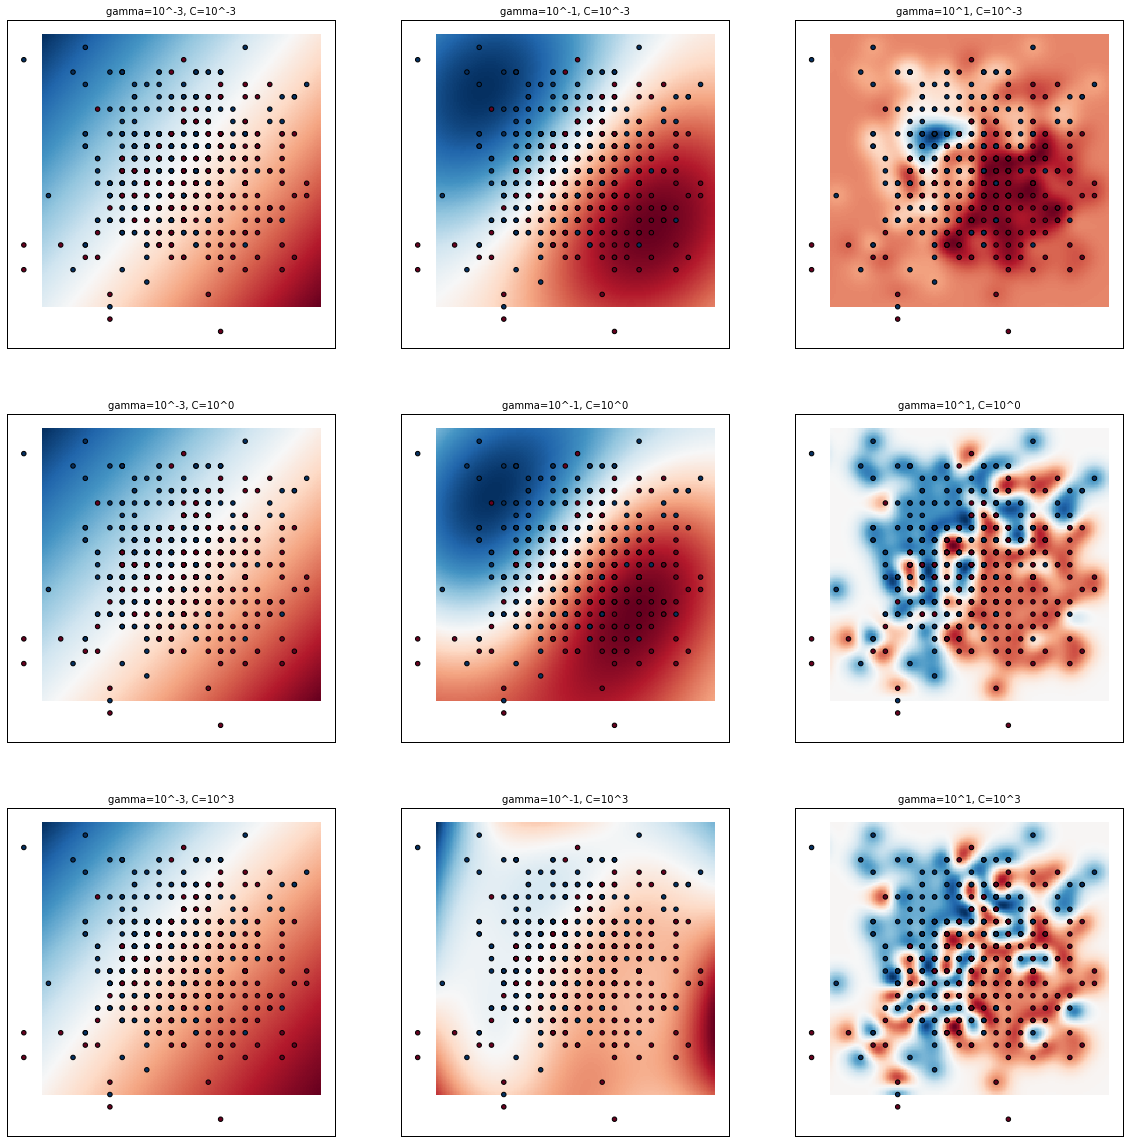

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

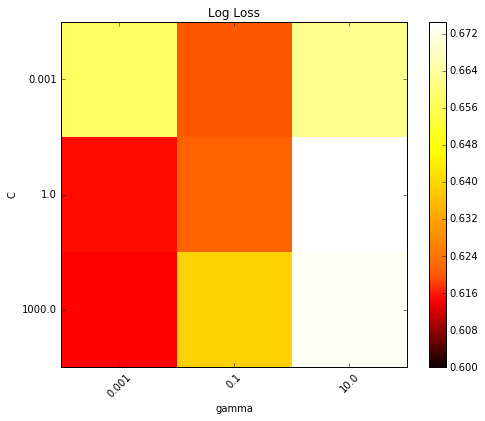

In [11]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

    
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
# We extract just the scores
scores = np.fabs([x[1] for x in grid.grid_scores_])
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.6, midpoint=0.62))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Log Loss')
plt.show()

In [130]:
def write_submission_file(model, featureList, scaler, submission_output_file): # see submission.ipynb for details
    import pandas as pd
    sample_df = pd.read_csv('data/SampleSubmissionWithFeatures.csv', index_col=0)
    Xsample = sample_df[featureList].values
    Xsample = scaler.transform(Xsample)
    sample_df['Pred'] = model.predict_proba(Xsample)[:,1] # predict_proba returns [prob label is 0, prob label is 1], kaggle wants 2nd column
    submission = sample_df[['Id', 'Pred']]
    submission.to_csv(submission_output_file, encoding='ascii', index=False)
submission_output_file = "data/submission.csv"
write_submission_file(model, featureList, scaler, submission_output_file)

In [131]:
submission_df = pd.read_csv(submission_output_file, index_col=0)
submission_df.head()

,Pred
Id,
2012_1104_1124,0.308521
2012_1104_1125,0.570377
2012_1104_1140,0.574224
2012_1104_1143,0.512888
2012_1104_1153,0.441978
